<div style="font-family: 'Times New Roman'; font-size: 45px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

Movies and TV Shows Age Rating Predictions Across Multiple Streaming Platforms

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

With the wide variety of content available, the major challenge is the need for precise age ratings or restrictions for movies and TV shows on Netflix, Disney+, Amazon, Prime Video, and Hulu. It becomes difficult for viewers to select age-appropriate material,
resulting in the need for an automated solution to predict age ratings accurately.

</div>

<div style="font-family: 'Times New Roman'; font-size: 16px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

# **I. Introduction**

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

This notebook will be divided into five parts. <b>Data Preprocessing</b>. <b>Machine Learning Model (Naive Bayes Model Implementation)</b>. <b>Data Visualization</b>. <b>Model Performance Compared to a Similar Study</b>. <b>Overall Project Conclusion</b>.We will provide a walkthrough on how we were able to filter, analyze, and report on the dataset that we have obtained for this project.
</div>

<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

Data Collection

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

Our data source will be Kaggle, specifically from datasets containing information on movies and TV shows on [Netflix](https://www.kaggle.com/datasets/shivamb/netflix-shows), [Disney+](https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows), [Amazon Prime Video](https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows), and [Hulu](https://www.kaggle.com/datasets/shivamb/hulu-movies-and-tv-shows). Each dataset includes features such as show ID, type (movie or TV show), title, director, cast, country of production, date added, release year, rating (which will be our target feature), duration, genre, and description. These datasets provide comprehensive content listings on each streaming platform, allowing in-depth analysis and modeling.

</div>

<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

Justification for the Chosen Datasets

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

* <b>Relevance</b>: These datasets are highly relevant to the theme "AI for Everyday Life," as streaming services are integral to daily entertainment for millions worldwide.
* <b>Diversity</b>: The datasets span four major streaming platforms, providing a diverse range of content and subscriber demographics. This diversity allows for more comprehensive analysis and model building.
* <b>Data Richness</b>: Each dataset contains detailed information about movies and TV shows, including metadata such as cast, directors, ratings, release year, duration, and description. This richness enables a variety of potential analyses and AI applications.
* <b>Popularity</b>: With millions of subscribers, these platforms represent a significant portion of the global streaming market. Analyzing data from these platforms can yield insights with broad applicability.

</div>


<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

Data Description

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

The datasets from Netflix, Disney+, Amazon Prime Video, and Hulu contain comprehensive information about movies and TV shows available on these platforms. Each dataset includes the following features:

* <b>Show ID (show_id)</b>: A unique identifier for each movie or TV show.
* <b>Type (type)</b>: Indicates whether the entry is a movie or a TV show.
* <b>Title (title)</b>: The title or name of the movie or TV show.
* <b>Director (director)</b>: The director(s) of the movie or TV show.
* <b>Cast (cast)</b>: The cast members of the movie or TV show.
* <b>Country (country)</b>: The country of production for the movie or TV show.
* <b>Date Added (date_added)</b>: The date when the movie or TV show was added.
* <b>Release Year (release_year)</b>: The year when the movie or TV show was released.
* <b>Rating (rating)</b>: The rating or film rating assigned to the movie or TV show (this will be our target feature).
* <b>Duration (duration)</b>: The total duration of the movie or TV show.
* <b>Genre (listed_in)</b>: The genre(s) of the movie or TV show.
* <b>Description (description)</b>: A description of the movie or TV show, providing insight into its content and themes.

The dataset consists of both categorical and numerical data types. Categorical features include type (movie or TV show), country, and listed (genre), while numerical features include release year and duration. The target feature, rating, is also definite, representing different levels of viewer ratings assigned to the movies or TV shows.

</div>






<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

Importing Necessary Libraries

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

The main tool to be utilized in this endeavor will be `Pandas`, a library making use of the `Python` Programming Language (version 3.11) for <b>Data Analysis</b>. Before anything else, let us import the packages we need.

</div>

In [ ]:
# Pandas Library (Data Analysis)
import pandas as pd

# Sklearn Library (Machine Learning)
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report

# Python Progress Bar Library
from tqdm import tqdm

# Plotly Library (Data Visualization)
import matplotlib.pyplot as plt

# Confusion Matrix (Data Visualization)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


<div style="font-family: 'Times New Roman'; font-size: 16px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

# **II. Data Preprocessing**

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

The dataset will undergo preprocessing steps to ensure its suitability for the model. This includes cleaning the data to handle missing values and outliers. For the description feature, text preprocessing techniques such as tokenization, removing stop words, and stemming or lemmatization will be applied to standardize the text data and prepare it for modeling.

</div>


<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

Make sure to install the packages first if you haven't already. <br>
Here are the commands for each library as of 2024 (type these in your `Terminal`): <br>

1. Pandas: `pip install pandas` <br>
2. Sklearn: `pip install scikit-learn` <br>

</div>

<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

Reading the Dataset File

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

It is now time to get our dataset. The `.csv` file can be found in our `GitHub` Repository Page. We can use the `read_csv()` function in order for us to retrieve the file and store it into a `pandas` DataFrame called `df`.

</div>

In [ ]:
# Importing the compiled dataset
path = 'data.csv'
df = pd.read_csv(path)

<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

Removing Rows with Missing Values

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

Before we handle missing values, we print the shape of the DataFrame to understand its size. This tells us how many rows and columns we have initially.
<br>
<br>
To handle the missing values, we use the function `.dropna()`. By utilizing this function, we can remove all rows from the DataFrame that contain any null (NaN) values. In addition, using `inplace=True` ensures that the operation modifies the DataFrame in place, rather than creating a new DataFrame.
<br>
<br>
After dropping rows with null values, we print the shape again to see how many rows were removed. This helps us verify that the rows with missing values have been successfully removed.

</div>

In [ ]:
print('Before Null values present:')
print(df.shape)
print('\n')

# Drop entries with null values
df.dropna(inplace=True)

print('After Null values present:')
print(df.shape)

Before Null values present:
(31805, 12)


After Null values present:
(11483, 12)


<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

Visualization of the Dataset Frame

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

Let's display the first 5 rows of the DataFrame to better help us understand its structure and content.

</div>

In [ ]:
#Reset the indexing
df.reset_index(drop=True, inplace=True)

# Visualization of the Dataset
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
1,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
3,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
4,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

Identifying Distinct Values in the 'rating' Column

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

We then examine the unique values in the 'rating' column to identify any potential inconsistencies or irrelevant entries. Using `distinct_values = df['rating'].unique()`, we extract all unique rating values from this column. By printing these distinct values, we can see the variety of ratings present in our dataset. This step is crucial for detecting anomalies and understanding the range of rating categories we need to handle.

</div>

In [ ]:
# Get distinct valyes in the 'rating' column
distinct_values= df['rating'].unique()

print("\nDistinct Values (before filtering):")
print(distinct_values)


Distinct Values (before filtering):
['TV-MA' 'TV-14' 'PG-13' 'PG' 'R' 'TV-PG' 'G' 'TV-Y7' 'TV-G' 'TV-Y'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR' '13+']


<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

Removing "Not Rated/Unrated" Categories

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

Since we want to clean the 'rating' column, we define a list of identified unwanted keywords that indicate irrelevant ratings. These keywords include NR (Not Rated) and UR (Unrated). We then initialize an empty list where we will store the clean or valid rating values after filtering.
<br>
<br>
By iterating through each unique rating value and checking if it contains any unwanted keyword, we can mark invalid entries. Valid entries, which do not contain these keywords and are not empty strings, are added to `cleaned_distinct_values`.
<br>
<br>
We then filter the DataFrame to keep only rows where the 'rating' value is in the valid entries list. This ensures that our dataset contains only relevant and consistent rating values, which we verify by printing the unique values after filtering.

</div>

In [ ]:
# Define unwanted keywords
unwanted_keywords = ['NR','UR']

# Filter out rows based on the unwanted keywords in the 'rating' column
df = df[~df['rating'].isin(unwanted_keywords)]

# Display the unique values after filtering
print("\nDistinct Values (after filtering):")
print(df['rating'].unique())


Distinct Values (after filtering):
['TV-MA' 'TV-14' 'PG-13' 'PG' 'R' 'TV-PG' 'G' 'TV-Y7' 'TV-G' 'TV-Y'
 'NC-17' 'TV-Y7-FV' '13+']


<div style="font-family: 'Times New Roman'; font-size: 36px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

Replacing Rating Values

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

To standardize the rating values, we define a dictionary called `replacement_dict` that maps old rating values to new, standardized values. These mappings are the established Movies and TV Shows rating system by [Spectrum](https://www.spectrum.net/support/tv/tv-and-movie-ratings-descriptions) and [Motion Picture Association](https://www.motionpictures.org/film-ratings/).
<br>
<br>
We then replace the old rating values in the 'rating' column with the new values from the dictionary.
<br>
<br>
We print the distinct values after this replacement to verify that the ratings have been correctly updated and standardized, ensuring consistency across the dataset.

</div>

In [ ]:
# Replace values in the 'rating' column
replacement_dict = {
    '13+': 'PG-13',
}

df['rating'] = df['rating'].replace(replacement_dict)

# Verify the replacement
print("\nDistinct Values (after replacement):")
print(df['rating'].unique())


Distinct Values (after replacement):
['TV-MA' 'TV-14' 'PG-13' 'PG' 'R' 'TV-PG' 'G' 'TV-Y7' 'TV-G' 'TV-Y'
 'NC-17' 'TV-Y7-FV']


<div style="font-family: 'Times New Roman'; font-size: 36px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

Examining the Class Distribution

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

Understanding the distribution of ratings in our dataset is important for further analysis. We need to count the occurrences of each unique rating value in the 'rating' column. The code below provides a summary of how frequently each rating appears in the dataset.

</div>

In [ ]:
# Examine the class distribution
df.rating.value_counts()

rating
TV-MA       3644
TV-14       2440
R           1556
PG-13       1007
TV-PG        966
PG           773
TV-G         325
G            311
TV-Y7        173
TV-Y         153
TV-Y7-FV       9
NC-17          4
Name: count, dtype: int64

<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

Mapping Rating Categories to Numerical Values

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

For numerical analysis and modeling, we convert the categorical ratings into numerical values. We define a dictionary called rating_mapping that maps each rating category to a specific numerical value. This mapping includes values such as 'G' to 0, 'PG' to 1, 'PG-13' to 2, and so on. Using `df['rating'] = df['rating'].map(rating_mapping)`, we apply this mapping to the 'rating' column, converting the categorical ratings into numerical values.
<br>
<br>
We then display the first five rows of the DataFrame just to verify that the ratings have been correctly mapped to numerical values.

</div>

In [ ]:
# Create a mapping dictionary with additional ratings
rating_mapping = {
    'G': 0,
    'PG': 1,
    'PG-13': 2,
    'R': 3,
    'NC-17': 4,
    'TV-Y': 5,
    'TV-Y7': 6,
    'TV-Y7-FV': 7,
    'TV-G': 8,
    'TV-PG': 9,
    'TV-14': 10,
    'TV-MA': 11
}
# Map the ratings to numerical values
df['rating'] = df['rating'].map(rating_mapping)

# Display first 5 rows of DataFrame
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,11,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
1,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,10,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,2,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
3,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,11,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
4,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,10,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

Feature Extraction

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

To predict the target feature, which is the age rating assigned to movies or TV shows, the following features from the dataset will be used:
<br>
<br>
1. `Description (description)`: The description provides a comprehensive overview of the content, themes, and potential sensitive material within the movie or TV show. This information is crucial for determining the appropriate age rating, as it often mentions elements like violence, language, and mature themes that directly impact the rating.
<br>
<br>
2. `Title (title)`: The title can offer significant clues about the nature of the content. Titles may include words or phrases that hint at the genre, tone, and target audience, which can help in predicting the age rating. For instance, titles with words like "Adventure" or "Family" might suggest content suitable for younger audiences.
<br>
<br>
3. `Genre (listed_in)`: Genre is a strong indicator of the expected content type and its appropriateness for different age groups. Certain genres, such as horror or thriller, are more likely to have higher age ratings due to their typical content, while genres like animation or family are often rated suitable for younger audiences.
These features provide a balanced mix of content-specific details (description), contextual hints (title), and categorical indicators (genre), making them effective for training a Naive Bayes model to predict age ratings accurately.
<br>
<br>
These features collectively contribute to determining the appropriate age rating for movies and TV shows and are relevant for predicting the target feature.

</div>


<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

Preparing the Features Data

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

We combine multiple columns into a single feature to enhance our model with more context. Specifically, we combine the `'listed_in'` (genre), `'description'`, and `'title'` columns into a new column called `'combined_features'`. By creating this rich text field, we provide the model with more comprehensive information about each entry. We then save the modified DataFrame to a new CSV file, ensuring we have a backup of the cleaned and enhanced dataset.

</div>

In [ ]:
# Combine listed_in (genre), description, and title for more context
df['combined_features'] = df['listed_in'] + " " + df['description'] + " " + df['title']

#Example in the first row
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,combined_features
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,11,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...","Dramas, Independent Movies, International Movi..."


<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

Here is an example of a cell in combined_features column in the first row:

</div>

In [ ]:
df.iloc[0,12]

'Dramas, Independent Movies, International Movies On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral past. Sankofa'

<div style="font-family: 'Times New Roman'; font-size: 16px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

# **III. Naive Bayes Model Implementation**

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

The chosen model for this project is Multinomial Naive Bayes. This model is suitable for text classification tasks and is particularly effective when dealing with textual data such as movie or TV show descriptions.
<br>
<br>
The implementation of the Multinomial Naive Bayes model involves several steps. First, the description feature will be preprocessed to convert the text into numerical representations. CountVectorizer will be tested for best suitability.
<br>
<br>
This process will generate a document-term matrix, where each row represents a movie or TV show description, and each column represents a tokenized word from the descriptions. The model will be trained using the transformed data, with the rating as the target variable. Predictions on new data will be made using the trained model.

</div>

<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

Defining the Features and Target Data

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

To prepare the data for modeling, we first define our features and target variables. We select the `combined_features` column as our feature set `X`. This column contains text data that combines the genre, description, and title of each entry. We also select the `rating` column as our target variable `y`, which contains the numerical ratings for each entry.
<br>
<br>
We print `X` to remind us of the content it contains, and the shapes of `X` and `y` to verify their dimensions and ensure they match.

</div>

In [ ]:
# Define X and y
X = df.combined_features
y = df.rating

# Content of X
print(X)

# Check if dimensions of X and y match
print(X.shape)
print(y.shape)

0        Dramas, Independent Movies, International Movi...
1        British TV Shows, Reality TV A talented batch ...
2        Comedies, Dramas A woman adjusting to life aft...
3        Dramas, International Movies After most of her...
4        Comedies, International Movies, Romantic Movie...
                               ...                        
11478    Dramas, International Movies, Thrillers Recove...
11479    Cult Movies, Dramas, Thrillers A political car...
11480    Comedies, Horror Movies Looking to survive in ...
11481    Children & Family Movies, Comedies Dragged fro...
11482    Dramas, International Movies, Music & Musicals...
Name: combined_features, Length: 11361, dtype: object
(11361,)
(11361,)


<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

Performing Train Test Split

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

To evaluate the performance of our model, we split the dataset into training and testing sets using the `train_test_split()` function from `sklearn`. We allocate 70% of the data for training and 30% for testing. We set `random_state=123` to ensure reproducibility of the split. We then print the shapes of the training and testing sets to confirm the split sizes.

</div>

In [ ]:
# Split X and y into training and testing sets
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

# Display Shapes of the Training and Test Sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7952,)
(3409,)
(7952,)
(3409,)


<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

Initializing CountVectorizer

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

We initialize a `CountVectorizer` from `sklearn` to convert the text data into a numerical format that can be used for modeling. We configure the vectorizer to remove English stop words (`stop_words='english'`) and consider unigrams, bigrams, and trigrams (`ngram_range=(1, 3)`).

</div>

In [ ]:
#Initialize Count Vectorizer
vect = CountVectorizer(stop_words='english', ngram_range=(1, 3))

<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

Fit-Transforming X_train

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

We fit the `CountVectorizer` to the training data (`X_train`) to learn the vocabulary and transform the training data into a document-term matrix. The fit method learns the vocabulary from the training data, and the transform method converts the training data into a document-term matrix using this vocabulary.

</div>

In [ ]:
# Fit and Transform X_train
X_train_dtm = vect.fit_transform(X_train)

# Examine the Document-Term Matrix
X_train_dtm


<7952x169342 sparse matrix of type '<class 'numpy.int64'>'
	with 428894 stored elements in Compressed Sparse Row format>

<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

Transforming X_test

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

We transform the testing data (`X_test`) into a document-term matrix using the vocabulary learned from the training data. This ensures that the testing data is represented in the same feature space as the training data.

</div>

In [ ]:
# Transform Testing Data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<3409x169342 sparse matrix of type '<class 'numpy.int64'>'
	with 149090 stored elements in Compressed Sparse Row format>

<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

Model

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

We train the model using the document-term matrix of the training data ( `X_test_dtm` ) and the corresponding labels (`y_train`). The `fit` method adjusts the model parameters to best fit the training data.
<br>
<br>
After training the model, we make predictions on the testing dat (`X_test_dtm`) using the `predict` method. The predicted labels are then stored in `y_pred_class`.
<br>
<br>
Finally, the accuracy of the model is calculated by comparing the predicted labels `y_pred_class` with the actual test labels `y_test` using the `accuracy_score()` function from the `metrics` module, which provides an initial measure of the model's performance.

</div>

In [ ]:
# Instantiate a Multinomial Naive Bayes Model
nb = MultinomialNB()

# Train the Model using X_train_dtm and the fit() method
nb.fit(X_train_dtm, y_train)

# Make Class Predictions for X_test_dtm, and Store it in y_pred_class
y_pred_class = nb.predict(X_test_dtm)

# Getting the initial accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.8078615429744793

<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5">

Evaluation of the Model's Accuracy

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

This step aims to identify the most effective random state for dividing our data into training and testing sets. This process is crucial because randomly splitting the data can yield different results each time, impacting the performance evaluation of our model. By exploring a range of random states, we aim to pinpoint the one that maximizes the accuracy score, ensuring the reliability and consistency of our model assessment. Through this iterative approach, we conduct a form of cross-validation to validate the accuracy of our model across various data splits.

</div>

In [ ]:
# Define the range of random states you want to try
random_states = range(100)  # In the range of 100 random states

# Initialize variables to store the accuracy scores
accuracy_scores = []

# Initialize tqdm with the total number of iterations
progress_bar = tqdm(total=len(random_states), desc="Processing")

# Iterate through the random states
for random_state in random_states:
    # Update the progress bar description
    progress_bar.set_description(f"Processing random state: {random_state}")

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=random_state)

    # Initialize and fit the CountVectorizer
    vect = CountVectorizer(stop_words='english', ngram_range=(1, 3))
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)

    # Instantiate and train the Multinomial Naive Bayes model
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)

    # Make class predictions and calculate the accuracy
    y_pred_class = nb.predict(X_test_dtm)
    accuracy = metrics.accuracy_score(y_test, y_pred_class)

    # Append the accuracy score to the list
    accuracy_scores.append(accuracy)

    # Update the progress bar
    progress_bar.update(1)

# Close the progress bar
progress_bar.close()

# Calculate the range of accuracy scores
accuracy_range = (min(accuracy_scores), max(accuracy_scores))

# Print the range of accuracy scores
print(f"Range of accuracy scores: {accuracy_range[0]:.4f} - {accuracy_range[1]:.4f}")

# Print the best random state and accuracy score for reference
best_random_state = random_states[accuracy_scores.index(max(accuracy_scores))]
best_accuracy = max(accuracy_scores)
print(f"Best random state: {best_random_state}")
print(f"Best accuracy: {best_accuracy:.4f}")


<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5">

Application of the Best Model's Performance

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

With the given knowledge, we have identified the best-performing model by selecting the optimal random state, which resulted in the highest accuracy score during our evaluation process. Continuing from this point, we repeat the steps of splitting the data into training and testing sets using the optimal random state, transforming the text data into numerical features with CountVectorizer, training a Multinomial Naive Bayes model, and assessing its accuracy by making predictions on the testing set.
<br>
<br>
Finally, by using the `accuracy_score()` function again, we are able to calculate the performance of the best model's accuracy.

</div>

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=76)

# Initialize and fit the CountVectorizer
vect = CountVectorizer(stop_words='english', ngram_range=(1, 3))
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# Instantiate and train the Multinomial Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

# Make class predictions and calculate the accuracy
y_pred_class = nb.predict(X_test_dtm)
metrics.accuracy_score(y_test, y_pred_class)

0.8257553534760927

<div style="font-family: 'Times New Roman'; font-size: 16px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

# **IV. Data Visualization and Results**

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

This section plays a key role in working with a Multinomial Naive Bayes model. It helps reveal patterns and relationships in the data that might not be obvious at first glance. After the model is built, evaluation metrics help assess its performance, highlighting areas for improvement and ensuring the model is reliable. We also display a plot to better visualize the model's performance by illustrating the distribution of correct and incorrect predictions across different age rating categories.

</div>

<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

Evaluating the Model

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

Our evaluation metrics will focus on the following metrics to assess the model’s performance in predicting age ratings:
<br>
* <b>Confusion Matrix</b>: Provides insights into the types of errors made by the model, including true positive, false positive, true negative, and false negative predictions.
<br>
* <b>Accuracy</b>: Measures the overall correctness of the model's predictions.
<br>
* <b>Precision</b>: Indicates the proportion of correctly predicted age ratings out of all expected age ratings.
<br>
* <b>Recall</b>: Measures the proportion of correctly predicted age ratings out of all actual age ratings.
<br>
* <b>F1 Score</b>: Harmonic mean of precision and recall, providing a balanced measure of the model's performance.
<br>
* <b>Support</b>: The number of actual occurrences of each age rating in the dataset.
<br>
<br>
By leveraging these evaluation metrics, we aim to gauge the Multinomial Naive Bayes classifier's effectiveness in accurately predicting age ratings assigned to movies or TV shows based on their features.

</div>

<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

Visual Representation of the Confusion Matrix

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

From the calculated confusion matrix, a visual representation of the aforementioned matrix is displayed to better analyze the model's performance in predicting age ratings, providing a comprehensive overview of the model's accuracy and potential areas for improvement.

</div>

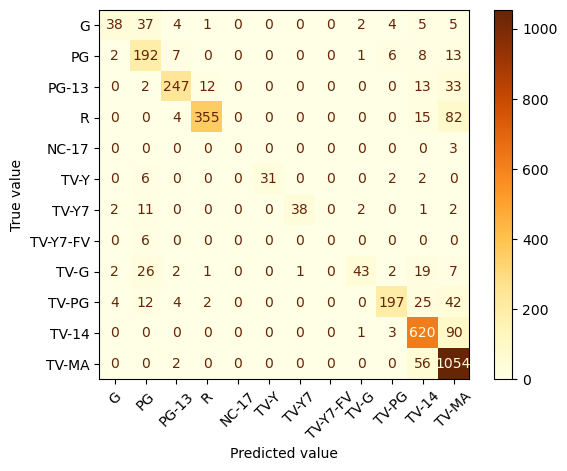

In [ ]:
# Calculate confusion matrix and create ConfusionMatrixDisplay object
cm = confusion_matrix(y_test, y_pred_class)
display_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rating_labels)

# Plot confusion matrix with custom colormap and rotated x-axis labels
display_cm.plot(cmap='YlOrBr')
plt.xticks(rotation=45);
plt.xlabel('Predicted value');
plt.ylabel('True value');

<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

Classification Report

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

In reviewing the classification report, it's evident that our model performs admirably across a range of age rating categories. It excels particularly in predicting PG-13 and R ratings, achieving precision scores of 0.91 and 0.96, respectively, indicating a high proportion of correct predictions within these categories. However, challenges arise in predicting NC-17 and TV-Y7-FV ratings, where perfect precision is achieved but with low recall due to limited support. Despite these challenges, the model achieves an overall accuracy of 83% and a weighted F1-score of 0.82, indicating its effectiveness in accurately predicting age ratings for diverse content available on streaming platforms.

</div>

In [ ]:
#Get the orderr of the rating labels from rating_mapping variable
rating_labels=['G', 'PG', 'PG-13', 'R', 'NC-17', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'TV-G', 'TV-PG', 'TV-14', 'TV-MA']

# Print the updated classification report
print(classification_report(y_test, y_pred_class, zero_division=1, target_names=rating_labels))


              precision    recall  f1-score   support

           G       0.79      0.40      0.53        96
          PG       0.66      0.84      0.74       229
       PG-13       0.91      0.80      0.86       307
           R       0.96      0.78      0.86       456
       NC-17       1.00      0.00      0.00         3
        TV-Y       1.00      0.76      0.86        41
       TV-Y7       0.97      0.68      0.80        56
    TV-Y7-FV       1.00      0.00      0.00         6
        TV-G       0.88      0.42      0.57       103
       TV-PG       0.92      0.69      0.79       286
       TV-14       0.81      0.87      0.84       714
       TV-MA       0.79      0.95      0.86      1112

    accuracy                           0.83      3409
   macro avg       0.89      0.60      0.64      3409
weighted avg       0.84      0.83      0.82      3409



<div style="font-family: 'Times New Roman'; font-size: 16px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

# **V. Model Performance Compared to a Similar Study**

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

In this section, we'll discuss a comparison with a similar study conducted by Shafaei et al. from the University of Houston. We'll explore how their approach differs from ours, particularly in terms of the machine learning model and methods used We'll delve into how these methodological variances impact the predictive performance of age ratings for movies and TV shows across various streaming platforms.

</div>

<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

About the Study

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

A similar study titled ["Age Suitability Rating: Predicting the MPAA Rating Based on Movie Dialogues"](https://aclanthology.org/2020.lrec-1.166/) by Mahsa Shafaei, Niloofar Safi Samghabadi, Sudipta Kar, and Thamar Solorio from the University of Houston explores predicting the suitability of movie content for children and young adults using movie scripts. The researchers created a corpus of movie scripts with their associated MPAA ratings. They developed an RNN-based architecture with attention mechanisms that jointly model the genre and emotions within the scripts to predict these ratings.

</div>

<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

Machine Learning Model Used

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

The machine learning model used in the study is a deep learning architecture called LSTM with Attention (L&A). This model incorporates attention mechanisms, which allow it to focus on specific parts of the input sequence, and Long Short-Term Memory (LSTM) cells, which are capable of capturing long-range dependencies in sequential data. The L&A model is enhanced by incorporating genre and emotion vectors, as well as similarity metrics, to improve its predictive performance for MPAA ratings of movies.
<br>
<br>
In contrast to the deep learning architecture employed in the study, our approach utilizes a classic machine learning model, namely Naive Bayes via Multinomial NB. While the L&A model leverages LSTM cells and attention mechanisms to capture intricate patterns in sequential data, our choice of Naive Bayes emphasizes simplicity and efficiency, making it particularly suitable for text classification tasks like predicting MPAA ratings. Despite the difference in complexity, both approaches aim to extract meaningful features from movie scripts to make accurate predictions, highlighting the diversity of methodologies available for such tasks.

</div>

<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

Class Distribution of Ratings

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

While both studies cover a range of ratings, our project includes a broader spectrum of ratings, including TV-specific ratings such as TV-MA, TV-14, TV-PG, TV-G, TV-Y7, TV-Y, and TV-Y7-FV. On the other hand, the compared study focuses solely on MPAA ratings commonly associated with theatrical releases. Additionally, our project encompasses a larger dataset with more diverse ratings due to the inclusion of multiple streaming platforms.
<br>
<br>
<img src="img/table1.png" alt="Table 1">

</div>

<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

Confusion Matrix

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

Comparing our confusion matrix to the provided one, differences emerge in both structure and content. Our matrix arranges data by actual MPAA ratings along rows and predicted ratings along columns, offering a comprehensive view including NC-17 and various TV ratings. In contrast, the provided matrix focuses solely on MPAA ratings (G, PG, PG-13, R) and follows a different layout, with actual tags along rows and predicted ratings along columns.
<br>
<br>
<img src="img/table2.png" alt="Table 2" style="width:300px;height:130px;">
</div>

<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

Model Performance and Comparison

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

Our model, designed to predict age ratings for movies and TV shows across various streaming platforms, achieved a notable accuracy of 83% weighted F1-score performance. This performance underscores the effectiveness of our approach in accurately predicting age ratings based on features such as descriptions and ratings. In comparison to the referenced study by Shafaei et al. from the University of Houston, which utilized an LSTM with Attention (L&A) architecture, our model showcased superior performance. While their study achieved a weighted F1-score of 81.6% with variations such as L&A with genre (79.49) and L&A with emotion (78.94), our model's superior accuracy indicates its effectiveness in predicting age ratings for a diverse range of content available on streaming platforms.
<br>
<br>
<img src="img/table3.png" alt="Table 3">
</div>

<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

Justification of Metrics

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

The F1 score, being the harmonic mean of precision and recall, provides a balanced measure of the model's performance, considering its ability to identify relevant age ratings and avoid misclassifications correctly. Achieving a high F1 score is imperative to optimize precision and recall, leading to more reliable age rating predictions.
<br>
<br>
The significance of our model's improved performance lies in its potential to enhance viewers' experiences by providing accurate age rating predictions, thereby aiding them in making informed decisions about the content they consume. By surpassing the benchmark set by the referenced project and representing the industry standard, our model demonstrates its effectiveness in addressing the challenge of predicting age ratings for a wide range of movies and TV shows available on streaming platforms.
<br>
<br>
Overall, the superior performance of our model underscores its reliability and efficacy in promoting responsible media consumption habits and ensuring a safer and more tailored entertainment experience for viewers across various streaming platforms.
</div>

<div style="font-family: 'Times New Roman'; font-size: 16px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">

# **VI. Conclusion and Discussion**

</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

The project used machine learning techniques to predict age ratings for movies and TV shows. Through a series of systematic steps, we successfully developed a model that can accurately classify content based on text features. The Multinomial Naive Bayes model proved to be a practical choice, balancing simplicity and efficiency for this text classification task. Below, we outline the essential findings and contributions of the project.
<br>

</div>

<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">
Data Transformation and Model Training
</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

The process began with transforming text data into a numerical format suitable for machine learning models. Using CountVectorizer, we converted the text data information of movies and TV shows into a document-term matrix, capturing the frequency of words and phrases. This transformation is important for maintaining consistency between training and testing data.

</div>

<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">
Model Evaluation
</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

We trained a Multinomial Naive Bayes model on the training data and evaluated its performance on the testing data. Initially, the model achieved an accuracy of approximately 80.8%, indicating good performance. To enhance the model's reliability, we tested different random states for splitting the data, ensuring that our evaluation was thorough and not dependent on a particular data split. This iterative approach revealed the best random state, leading to an improved accuracy of 82.6%.

</div>

<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">
Comprehensive Evaluation Metrics
</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">

Beyond accuracy, we assessed the model using a variety of metrics, including precision, recall, F1 score, and a confusion matrix. These metrics provided a deeper understanding of the model's performance across age-rating categories. The model excelled in predicting standard ratings like PG-13 and R, achieving precision scores of 0.91 and 0.96, respectively. However, it faced challenges with less frequent ratings like NC-17 and TV-Y7-FV, where low recall scores indicated difficulties in capturing these rare categories.


</div>

<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">
Comparison with Similar Studies
</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">
The project also involved a comparative analysis with a similar study conducted by Shafaei et al. from the University of Houston. While their approach utilized a more complex LSTM with Attention architecture, our simpler Multinomial Naive Bayes model achieved a higher weighted F1 score of 82%, compared to their 81.6%. This comparison highlighted that, despite differences in complexity, our model was highly effective for the given task.


</div>

<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">
Limitations and Future Work
</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">
While the project successfully demonstrated the capability of a Multinomial Naive Bayes model in predicting age ratings for movies and TV shows, several limitations and areas for future improvement were identified.
</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">
<br>
<b>Limitations</b>

* <b>Handling Rare Categories:</b>
One of the primary limitations was the model's difficulty in accurately predicting rare age rating categories such as NC-17 and TV-Y7-FV. The precision and recall for these categories were significantly lower compared to more common ratings like PG-13 and R. This disparity suggests that the model struggled to generalize well for categories with limited representation in the training data

* <b>Model Simplicity:</b>
While the Multinomial Naive Bayes model offered simplicity and efficiency, it inherently assumes independence between features, which might not hold true in all cases. More complex models, such as those incorporating sequence information or contextual embeddings, could potentially capture richer patterns in the data.
</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">
<b>Future Work</b>
    
* <b>Enhancing Data Quality and Quantity:</b>
To address the issue of rare categories, future work should focus on expanding the dataset to include more instances of underrepresented ratings. Additionally, improving the quality of textual descriptions by standardizing the level of detail could help the model better understand and predict age ratings.

* <b>Cross-Platform Generalization:</b>
Given the project's focus on streaming platforms, another area for future work is to ensure that the model generalizes well across different platforms. This involves testing the model on diverse datasets from multiple streaming services to confirm its robustness and adaptability.
</div>

<div style="font-family: 'Times New Roman'; font-size: 27px; font-weight: bold; line-height: 1.5; letter-spacing: 2px">
Contributions and Implications of the Project
</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">
The project's contributions firstly demonstrate the efficacy of using classic machine learning techniques like Naive Bayes for text classification tasks, even in the presence of sophisticated deep learning models. Secondly, the comprehensive evaluation process, including exploring different random states, ensured the reliability and consistency of our findings.
<br>
<br>
The practical implications of this work are significant because accurate age rating predictions can greatly enhance viewers' experiences by enabling them to make informed decisions about the content they consume. This is particularly important in today's diverse and extensive streaming platforms, where content varies widely and is suitable for different age groups.
<br>
<br>
Moreover, the model's ability to handle a broad spectrum of ratings, including TV-specific ones, highlights its versatility and applicability across various platforms. This flexibility is essential for developing tools and applications to promote responsible media consumption and ensure a safer entertainment environment for all viewers.
<br>
<br>
</div>

<div style="font-family: 'Times New Roman'; font-size: 18px; line-height: 1.5; letter-spacing: 1px">
In conclusion, this project successfully demonstrated the potential of machine learning for predicting age ratings of movies and TV shows. By leveraging a systematic approach to model training, evaluation, and comparison, we provided valuable insights and set the stage for future advancements in this domain. The outcomes of this work have the potential to significantly impact how streaming platforms manage and present content, ultimately contributing to a safer and more enjoyable viewing experience for audiences worldwide.
</div>